# Evaluating Machine Learning Algorithms for Intrusion Detection in Computer Networks

## Importing Required Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import itertools
import random

# To Avoid Printing Warnings

from warnings import filterwarnings
filterwarnings('ignore')

## Column Names

In [2]:
col_names = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

## Loading the Dataset

In [3]:
train = pd.read_csv('C:/Users/DELL/Downloads/IntrusionDetection-main/IntrusionDetection-main/KDDTrain+.txt', header=None,names=col_names)
test = pd.read_csv('C:/Users/DELL/Downloads/IntrusionDetection-main/IntrusionDetection-main/KDDTest+.txt', header=None,names=col_names)
df=pd.read_csv('C:/Users/DELL/Downloads/IntrusionDetection-main/IntrusionDetection-main/KDDTrain+.txt', header=None,names=col_names)
df_test=pd.read_csv('C:/Users/DELL/Downloads/IntrusionDetection-main/IntrusionDetection-main/KDDTest+.txt', header=None,names=col_names)

## Checking Training Data Dimensions

In [4]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
print(f'Dimensions of the Training set:{df.shape}')
print(f'Dimensions of the Test set:{df_test.shape}')

Dimensions of the Training set:(125973, 43)
Dimensions of the Test set:(22544, 43)


## Data Pre-Processing

#### Mapping Normal Packet Flow as 0 and Attack as 1 (Encoding)

In [6]:
# Training Dataset

is_attack = train.attack.map(lambda a: 0 if a == 'normal' else 1)

# Testing Dataset

test_attack = test.attack.map(lambda a: 0 if a == 'normal' else 1)

#### Adding Column to Actual Dataset

In [7]:
# Adding to Training Dataset

train['attack_flag'] = is_attack

# Addings to Testing Dataset

test['attack_flag'] = test_attack

## Checking Training Data Dimensions Again

In [8]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


#### Classifying Attacks into 4 Categories

In [9]:
# lists to hold our attack classifications

dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

In [10]:
# The labels for various Attacks

attack_labels = ['Normal','DoS','Probe','Privilege','Access']

#### Label Encoding

In [11]:
# Mapping Attack Labels to Numbers

def mapping_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0
        
    return attack_type

In [12]:
# Mapping Data for Training Dataset

attack_map = train.attack.apply(mapping_attack)
train['attack_map'] = attack_map

In [13]:
# Mapping Data for Testing Dataset

test_attack_map = test.attack.apply(mapping_attack)
test['attack_map'] = test_attack_map

In [14]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0,0


## Data Visualization

#### Checking Attack Types and the Protocol Counts

In [15]:
attack_vs_protocol = pd.crosstab(train.attack, train.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


In [16]:
# Pie Charts

def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # setup for mapping colors
    color_list = sns.color_palette('flare')
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # build the subplots
    fig, axis = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # build the wedges
        wedges,texts = axis[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axis[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axis[count].set_title(labels[count])
        
    return axis 

#### Counts for the Normal Class and Attack Class

In [17]:
train['target'] = train.iloc[:,41].apply(lambda x: 0 if x == 'normal' else 1)
test['target'] = test.iloc[:,41].apply(lambda x: 0 if x == 'normal' else 1)
data = train['target'].value_counts()
lab = ['normal','attack']
data

0    67343
1    58630
Name: target, dtype: int64

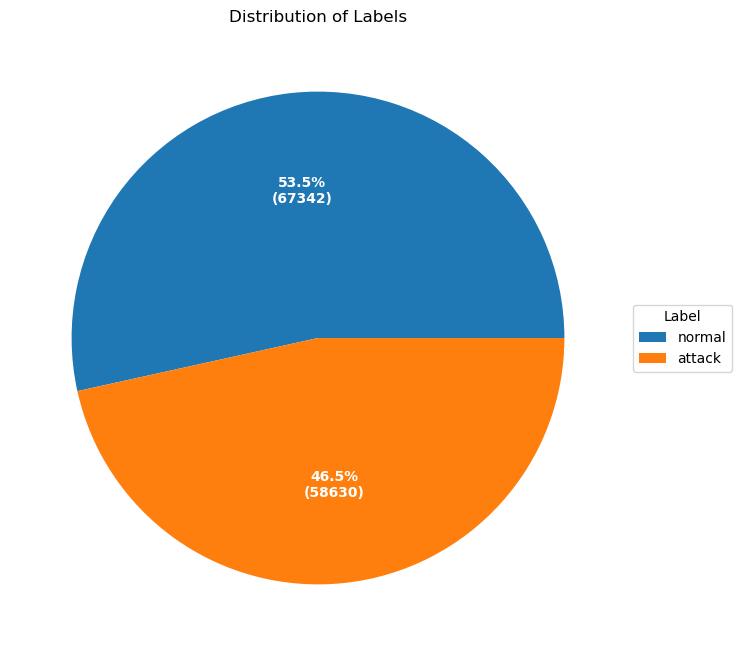

In [18]:
# Plotting Pie Chart for The Distribution of various Labels

%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, lab,
          title="Label",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribution of Labels")

plt.show()

#### Attack Type Distribution

In [19]:
# Calculating Number of Occurences of the Four Type of Attacks

DOS = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','upstorm','worm']
Probe = ['ipsweep','nmap','mscan','portsweep','saint','satan']
U2R = ['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']
R2L = ['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','Snmpgetattack','spy','snmpguess','warzclient','warzmaster','xlock','xsnoop']
count = {'DOS':0, 'Probe':0, 'U2R':0, 'R2L':0}
for attack in train.attack:
    if attack in DOS:
        count['DOS'] += 1
    elif attack in Probe:
        count['Probe'] += 1
    elif attack in U2R:
        count['U2R'] += 1
    elif attack in R2L:
        count['R2L'] += 1
count

{'DOS': 45927, 'Probe': 11656, 'U2R': 52, 'R2L': 85}

#### Pie Chart for Distribution of Attacks

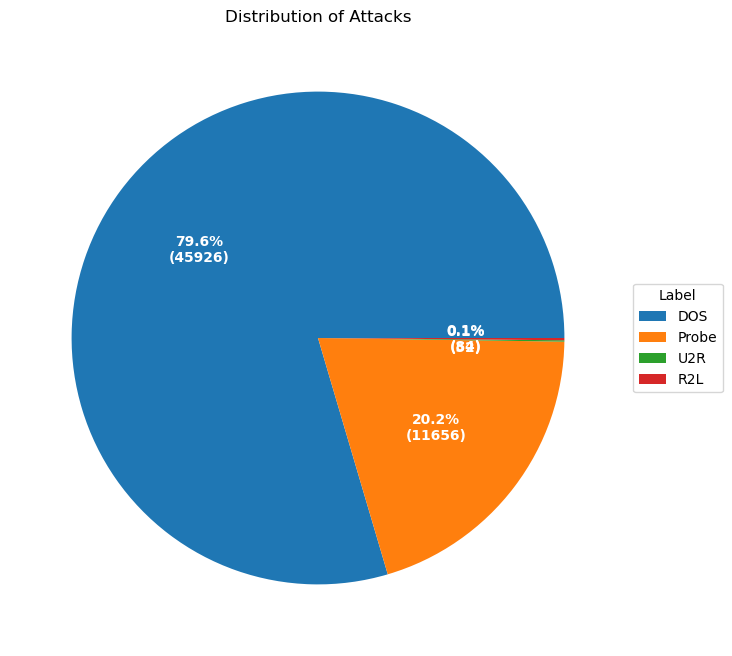

[45927, 11656, 52, 85]

In [20]:
data = list(count.values())
lab = list(count.keys())
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, lab,
          title="Label",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribution of Attacks")

plt.show()
data

## Detailed Exploration of the Attack Column 

In [21]:
# Checking Value Counts of Training Dataset Attack Column

train.iloc[:,41].value_counts(dropna=False) 

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [22]:
# Checking Value Counts of Test Dataset Attack Column

test.iloc[:,41].value_counts(dropna=False) 

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: attack, dtype: int64

#### Removing The Column which is Irrelevant to Results

In [23]:
#Serverity Column is being removed

train.drop(train.iloc[:, 41:45], inplace = True, axis = 1)
test.drop(test.iloc[:, 41:45], inplace = True, axis = 1)

In [24]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [25]:
#OneHotEncoding

categorical = [1,2,3]
encoder = LabelEncoder()
for col in categorical:
    train.iloc[:,col] = pd.Series(encoder.fit_transform(train.iloc[:,col]))
    test.iloc[:,col] = pd.Series(encoder.transform(test.iloc[:,col]))   

## Train Test Split

In [26]:
train = pd.concat([train,test],axis=0)

X = train.drop(columns='target',axis=1)
y = train.target

scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X))

X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,random_state=10)

# Implementing Machine Learning Models

### Decision Tree

In [27]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2)

clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
pred_dt = clf.predict(X_test)

print(f"Train score: {clf.score(X_train, y_train)}")
print(f'Test score: {clf.score(X_test, y_test)}')
print(f"Classification report:\n {classification_report(pred_dt,y_test)}")
print(f"Average weighted precision: {precision_score(y_test,pred_dt)}")
print(f"Average weighted recall: {recall_score(y_test,pred_dt)}")
print(f"Average weighted f1 score: {f1_score(y_test,pred_dt)}")

Train score: 0.9236625458985339
Test score: 0.9242391597091301
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93     19925
           1       0.90      0.94      0.92     17205

    accuracy                           0.92     37130
   macro avg       0.92      0.93      0.92     37130
weighted avg       0.93      0.92      0.92     37130

Average weighted precision: 0.9384481255448998
Average weighted recall: 0.9020111731843575
Average weighted f1 score: 0.9198689645349665


In [28]:
# OneHotEncoding Columns

from sklearn.preprocessing import OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']

# insert code to get a list of categorical columns into a variable, categorical_columns

categorical_columns=['protocol_type', 'service', 'flag'] 

# Get the categorical values into a 2D numpy array

df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]
df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [29]:
# Getting Unique Protocol_type

unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]

# Getting Unique_service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]

# Getting Unique Flags
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]

# Dummy Column Headings
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

# Repeating Same for Test Dataset
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [30]:
# Encoding Categorical Variables

df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())

# Applying Same to Test Dataset 
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [31]:
# One Hot Encoding The Columns
enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)

# Test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
# Checking Symmetric Difference of Services

trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()

# Difference
difference=list(set(trainservice) - set(testservice))

# Creating New Column Names
string = 'service_'
difference=[string + x for x in difference]
difference

['service_harvest',
 'service_urh_i',
 'service_red_i',
 'service_aol',
 'service_http_8001',
 'service_http_2784']

In [33]:
for col in difference:
    testdf_cat_data[col] = 0

testdf_cat_data.shape

(22544, 84)

In [34]:
# Creating New DataFrame
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)

# Test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125973, 124)
(22544, 124)


In [35]:
# Label Column Train and Test

label_df=newdf['attack']
label_df_test=newdf_test['attack']

# Transforming Categorical Values to Numbers (5 Categories)
new_label_df=label_df.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 
                            'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 
                            'apache2': 1, 'processtable': 1, 'udpstorm': 1, 
                            'worm': 1, 'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,
                            'satan' : 2,'mscan' : 2,'saint' : 2,
                            'ftp_write': 3,'guess_passwd': 3,'imap': 3,
                            'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,
                            'warezmaster': 3,'sendmail': 3,'named': 3,
                            'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,
                            'xsnoop': 3,'httptunnel': 3, 'buffer_overflow': 4,
                            'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,
                            'sqlattack': 4,'xterm': 4})

# Transforming Categorical Values to Numbers (5 Categories)
new_label_df_test=label_df_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1,
                                      'land': 1, 'pod': 1, 'smurf': 1, 
                                      'teardrop': 1,'mailbomb': 1, 'apache2': 1,
                                      'processtable': 1, 'udpstorm': 1, 
                                      'worm': 1, 'ipsweep' : 2,'nmap' : 2,
                                      'portsweep' : 2,'satan' : 2,'mscan' : 2,
                                      'saint' : 2, 'ftp_write': 3,
                                      'guess_passwd': 3,'imap': 3,'multihop': 3,
                                      'phf': 3,'spy': 3,'warezclient': 3,
                                      'warezmaster': 3,'sendmail': 3,'named': 3,
                                      'snmpgetattack': 3,'snmpguess': 3,
                                      'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                                      'buffer_overflow': 4,'loadmodule': 4,
                                      'perl': 4,'rootkit': 4,'ps': 4,
                                      'sqlattack': 4,'xterm': 4})


newdf['attack'] = new_label_df
newdf_test['attack'] = new_label_df_test
print(newdf['attack'].head())

0    0
1    0
2    1
3    0
4    0
Name: attack, dtype: int64


#### Classifying Data Based on The Category of Attack

In [36]:
# Index Values of the columns to Drop

to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdf[~newdf['attack'].isin(to_drop_DoS)];
Probe_df=newdf[~newdf['attack'].isin(to_drop_Probe)];
R2L_df=newdf[~newdf['attack'].isin(to_drop_R2L)];
U2R_df=newdf[~newdf['attack'].isin(to_drop_U2R)];

# Applying Same for Testing Dataset

DoS_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_U2R)];

print('Train')
print("=================================")
print(f'Dimensions of DoS: {DoS_df.shape}')
print(f'Dimensions of Probe: {Probe_df.shape}')
print(f'Dimensions of R2L: {R2L_df.shape}')
print(f'Dimensions of U2R: {U2R_df.shape}')
print('\n\nTest')
print("=================================")
print(f'Dimensions of DoS: {DoS_df_test.shape}')
print(f'Dimensions of Probe: {Probe_df_test.shape}')
print(f'Dimensions of R2L: {R2L_df_test.shape}')
print(f'Dimensions of U2R: {U2R_df_test.shape}')

Train
Dimensions of DoS: (113270, 124)
Dimensions of Probe: (78999, 124)
Dimensions of R2L: (68338, 124)
Dimensions of U2R: (67395, 124)


Test
Dimensions of DoS: (17171, 124)
Dimensions of Probe: (12132, 124)
Dimensions of R2L: (12596, 124)
Dimensions of U2R: (9778, 124)


#### Train Test Split

In [37]:
# Splitting dataframes into X & Y

X_DoS = DoS_df.drop('attack',1)
Y_DoS = DoS_df.attack
X_Probe = Probe_df.drop('attack',1)
Y_Probe = Probe_df.attack
X_R2L = R2L_df.drop('attack',1)
Y_R2L = R2L_df.attack
X_U2R = U2R_df.drop('attack',1)
Y_U2R = U2R_df.attack

# Repeat for Testing Dataset

X_DoS_test = DoS_df_test.drop('attack',1)
Y_DoS_test = DoS_df_test.attack
X_Probe_test = Probe_df_test.drop('attack',1)
Y_Probe_test = Probe_df_test.attack
X_R2L_test = R2L_df_test.drop('attack',1)
Y_R2L_test = R2L_df_test.attack
X_U2R_test = U2R_df_test.drop('attack',1)
Y_U2R_test = U2R_df_test.attack

In [38]:
colNames = list(X_DoS)
colNames_test = list(X_DoS_test)

##### Data Scaling 

In [39]:
from sklearn import preprocessing

# Training Data Scaling

scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS) 
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe) 
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L) 
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R) 

# Testing Data Scaling

scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test) 
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test) 
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test) 
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

##### Feature Selection Using Recursive Feature Elimination (RFE)

In [40]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
classif = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=classif, n_features_to_select=13, step=1)

# DoS Attack 

Y_DoS = Y_DoS.astype('int') 
rfe.fit(X_DoS, Y_DoS)
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [41]:
# Probe Attack 

Y_Probe = Y_Probe.astype('int')
rfe.fit(X_Probe, Y_Probe)
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)

In [42]:
# R2L Attack 

Y_R2L = Y_R2L.astype('int')
rfe.fit(X_R2L, Y_R2L)
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [43]:
# U2R Attack 

Y_U2R = Y_U2R.astype('int')
rfe.fit(X_U2R, Y_U2R)
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

In [44]:
print(f'Features selected for DoS: {rfecolname_DoS}')
print(f'\nFeatures selected for Probe: {rfecolname_Probe}')
print(f'\nFeatures selected for R2L: {rfecolname_R2L}')
print(f'\nFeatures selected for U2R: {rfecolname_U2R}')

Features selected for DoS: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'count', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'level', 'service_X11', 'service_ecr_i', 'service_ftp_data']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'rerror_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'level', 'service_finger', 'service_ftp_data', 'service_http', 'service_private', 'service_smtp']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'num_root', 'serror_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'level', 'service_ftp_data']

Features selected for U2R: ['dst_bytes', 'num_compromised', 'count', 'dst_host_count', 'dst_host_srv_diff_host_rate', 'level', 'service_ftp_data', 'service_nntp', 'service_ntp_u', 'service_other', 'service_urh_i', 'flag_S

##### Fitting the Model

In [45]:
# Declaring Objects

clf_rfeDoS=DecisionTreeClassifier(random_state=0)
clf_rfeProbe=DecisionTreeClassifier(random_state=0)
clf_rfeR2L=DecisionTreeClassifier(random_state=0)
clf_rfeU2R=DecisionTreeClassifier(random_state=0)

# Fitting Models

clf_rfeDoS.fit(X_rfeDoS, Y_DoS)
clf_rfeProbe.fit(X_rfeProbe, Y_Probe)
clf_rfeR2L.fit(X_rfeR2L, Y_R2L)
clf_rfeU2R.fit(X_rfeU2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

In [46]:
# Generating Testing Sets

X_DoS_test2=X_DoS_test[:,rfecolindex_DoS]
X_Probe_test2=X_Probe_test[:,rfecolindex_Probe]
X_R2L_test2=X_R2L_test[:,rfecolindex_R2L]
X_U2R_test2=X_U2R_test[:,rfecolindex_U2R]

In [47]:
# Testing for DOS

Y_DoS_pred2=clf_rfeDoS.predict(X_DoS_test2)
pd.crosstab(Y_DoS_test, Y_DoS_pred2, rownames=['Actual attacks'], 
            colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9148,563
1,1701,5759


In [48]:
# Testing for Probe

Y_Probe_pred2=clf_rfeProbe.predict(X_Probe_test2)
pd.crosstab(Y_Probe_test, Y_Probe_pred2, rownames=['Actual attacks'], 
            colnames=['Predicted attacks'])

Predicted attacks,0,2
Actual attacks,,
0,8644,1067
2,818,1603


In [49]:
# Testing for R2L

Y_R2L_pred2=clf_rfeR2L.predict(X_R2L_test2)
pd.crosstab(Y_R2L_test, Y_R2L_pred2, rownames=['Actual attacks'], 
            colnames=['Predicted attacks'])

Predicted attacks,0,3
Actual attacks,,
0,9707,4
3,2875,10


In [50]:
# Testing for U2R

Y_U2R_pred2=clf_rfeU2R.predict(X_U2R_test2)
pd.crosstab(Y_U2R_test, Y_U2R_pred2, rownames=['Actual attacks'], 
            colnames=['Predicted attacks'])

Predicted attacks,0,4
Actual attacks,,
0,9711,0
4,59,8


In [51]:
# Cross Validation Scores- DOS

from sklearn.model_selection import cross_val_score
accuracydos = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, 
                           scoring='accuracy')
print("For DOS Attack")
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracydos.mean(), accuracydos.std() * 2))
precisiondos = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, 
                            scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precisiondos.mean(), precisiondos.std() * 2))
recalldos = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, 
                         scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recalldos.mean(), recalldos.std() * 2))
fdos = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='f1')
print("F1 score: %0.5f (+/- %0.5f)" % (fdos.mean(), fdos.std() * 2))

For DOS Attack
Accuracy: 0.99785 (+/- 0.00209)
Precision: 0.99719 (+/- 0.00279)
Recall: 0.99786 (+/- 0.00299)
F1 score: 0.99752 (+/- 0.00240)


In [52]:
# Cross Validation Scores- Probe

accuracyprobe = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, 
                           scoring='accuracy')
print("For Probe Attack")
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracyprobe.mean(), accuracyprobe.std() * 2))
precisionprobe = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, 
                            scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precisionprobe.mean(), precisionprobe.std() * 2))
recallprobe = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, 
                         scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recallprobe.mean(), recallprobe.std() * 2))
fprobe = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, 
                    scoring='f1_macro')
print("F1 score: %0.5f (+/- %0.5f)" % (fprobe.mean(), fprobe.std() * 2))

For Probe Attack
Accuracy: 0.99580 (+/- 0.00290)
Precision: 0.99308 (+/- 0.00652)
Recall: 0.99381 (+/- 0.00500)
F1 score: 0.99343 (+/- 0.00453)


In [53]:
# Cross Validation Scores- R2L
accuracyr2l = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, 
                           scoring='accuracy')
print("For R2L Attack")
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracyr2l.mean(), accuracyr2l.std() * 2))
precisionr2l = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, 
                            scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precisionr2l.mean(), precisionr2l.std() * 2))
recallr2l = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, 
                         scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recallr2l.mean(), recallr2l.std() * 2))
fr2l = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, 
                    scoring='f1_macro')
print("F1 score: %0.5f (+/- %0.5f)" % (fr2l.mean(), fr2l.std() * 2))

For R2L Attack
Accuracy: 0.99301 (+/- 0.00375)
Precision: 0.99001 (+/- 0.00583)
Recall: 0.99023 (+/- 0.00657)
F1 score: 0.99011 (+/- 0.00530)


In [54]:
# Cross Validation Scores- U2R

accuracyu2r = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, 
                           scoring='accuracy')
print("For U2R Attack")
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracyu2r.mean(), accuracyu2r.std() * 2))
precisionu2r = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, 
                            scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precisionu2r.mean(), precisionu2r.std() * 2))
recallu2r = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, 
                         scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recallu2r.mean(), recallu2r.std() * 2))
fu2r = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, 
                    scoring='f1_macro')
print("F1 score: %0.5f (+/- %0.5f)" % (fu2r.mean(), fu2r.std() * 2))

For U2R Attack
Accuracy: 0.99877 (+/- 0.00200)
Precision: 0.96660 (+/- 0.08669)
Recall: 0.94736 (+/- 0.12001)
F1 score: 0.95319 (+/- 0.07663)


In [55]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [56]:
from prettytable import PrettyTable

# Create a dictionary to hold the metric scores for each type of attack
metric_scores = {
    'Attack Type': ['DOS', 'Probe', 'R2L', 'U2R'],
    'Accuracy': [accuracydos.mean(), accuracyprobe.mean(), accuracyr2l.mean(), accuracyu2r.mean()],
    'Precision': [precisiondos.mean(), precisionprobe.mean(), precisionr2l.mean(), precisionu2r.mean()],
    'Recall': [recalldos.mean(), recallprobe.mean(), recallr2l.mean(), recallu2r.mean()],
    'F1 Score': [fdos.mean(), fprobe.mean(), fr2l.mean(), fu2r.mean()]
}

# Create a pandas DataFrame from the dictionary
metrics_table = pd.DataFrame(metric_scores)

# Create a PrettyTable and add columns
table = PrettyTable()
table.field_names = ["Attack Type", "Accuracy", "Precision", "Recall", "F1 Score"]

# Add rows to the table from the pandas DataFrame
for row in metrics_table.itertuples():
    table.add_row(row[1:])

# Print the metrics table
print(table)

+-------------+--------------------+--------------------+--------------------+--------------------+
| Attack Type |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+-------------+--------------------+--------------------+--------------------+--------------------+
|     DOS     | 0.9978451464265786 | 0.9971880328969023 | 0.9978552278820375 | 0.9975208691425197 |
|    Probe    | 0.9957962273068665 | 0.9930755791661184 | 0.9938063332265393 | 0.9934278296977015 |
|     R2L     | 0.9930134145265204 | 0.9900117643333658 | 0.9902321528963887 | 0.990109983825333  |
|     U2R     | 0.9987727968217888 | 0.9666042558416071 | 0.9473616340663487 | 0.9531892880596775 |
+-------------+--------------------+--------------------+--------------------+--------------------+


### Random Forest

In [57]:
# Random Forest

rf_mod = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state= 10, verbose= 1)
rf_mod.fit(X_train, y_train)

print(f"Train score: {rf_mod.score(X_train, y_train)}")

pred_rf = rf_mod.predict(X_test)
print(f'Test score: {rf_mod.score(X_test, y_test)}')

print(f"Classification report: ",classification_report(pred_rf,y_test))

print(f"Average weighted precision: {precision_score(y_test,pred_rf)}")
print(f"Average weighted recall: {recall_score(y_test,pred_rf)}")
print(f"Average weighted f1 score: {f1_score(y_test,pred_rf)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   45.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train score: 0.9994703152073402


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.3s finished


Test score: 0.9954214920549421
Classification report:                precision    recall  f1-score   support

           0       1.00      0.99      1.00     19264
           1       0.99      1.00      1.00     17866

    accuracy                           1.00     37130
   macro avg       1.00      1.00      1.00     37130
weighted avg       1.00      1.00      1.00     37130

Average weighted precision: 0.9961938878316355
Average weighted recall: 0.9943016759776536
Average weighted f1 score: 0.9952468825141195


### Support Vector Machine (SVM)

In [58]:
#Support Vector Machine

svm_mod = SVC(probability=True)
svm_mod.fit(X_train, y_train)

print("Train score: ",svm_mod.score(X_train, y_train))

pred_svc = svm_mod.predict(X_test)
print('Test score:',svm_mod.score(X_test, y_test))

print("Classification report: ",classification_report(pred_svc,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_svc))
print("Average weighted recall: ",recall_score(y_test,pred_svc))
print("Average weighted f1 score: ",f1_score(y_test,pred_svc))

Train score:  0.9836875039277474
Test score: 0.9828709938055481
Classification report:                precision    recall  f1-score   support

           0       0.99      0.98      0.98     19410
           1       0.98      0.99      0.98     17720

    accuracy                           0.98     37130
   macro avg       0.98      0.98      0.98     37130
weighted avg       0.98      0.98      0.98     37130

Average weighted precision:  0.9871331828442438
Average weighted recall:  0.9772067039106145
Average weighted f1 score:  0.9821448624368333


### Logistic Regression

In [59]:
lg_mod = LogisticRegression()
lg_mod.fit(X_train, y_train)

print("Train score: ",lg_mod.score(X_train, y_train))

pred_lg = lg_mod.predict(X_test)
print('Test score:',lg_mod.score(X_test, y_test))

print("Classification report: ",classification_report(pred_lg,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_lg))
print("Average weighted recall: ",recall_score(y_test,pred_lg))
print("Average weighted f1 score: ",f1_score(y_test,pred_lg))

Train score:  0.9361954267553664
Test score: 0.9373552383517372
Classification report:                precision    recall  f1-score   support

           0       0.96      0.93      0.94     19840
           1       0.92      0.95      0.93     17290

    accuracy                           0.94     37130
   macro avg       0.94      0.94      0.94     37130
weighted avg       0.94      0.94      0.94     37130

Average weighted precision:  0.9503759398496241
Average weighted recall:  0.9179888268156424
Average weighted f1 score:  0.9339016766126741


### Gaussian Naive Bayes

In [60]:
gnb_mod = GaussianNB()
gnb_mod.fit(X_train, y_train)

print("Train score: ",gnb_mod.score(X_train, y_train))

pred_nb = gnb_mod.predict(X_test)
print('Test score:',gnb_mod.score(X_test, y_test))

print("Classification report: ",classification_report(pred_nb,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_nb))
print("Average weighted recall: ",recall_score(y_test,pred_nb))
print("Average weighted f1 score: ",f1_score(y_test,pred_nb))

Train score:  0.8799680393582734
Test score: 0.8808241314301104
Classification report:                precision    recall  f1-score   support

           0       0.89      0.88      0.89     19399
           1       0.87      0.88      0.88     17731

    accuracy                           0.88     37130
   macro avg       0.88      0.88      0.88     37130
weighted avg       0.88      0.88      0.88     37130

Average weighted precision:  0.87998420844848
Average weighted recall:  0.8716759776536313
Average weighted f1 score:  0.8758103898290813


### Gradient Boosting

In [61]:
gb_mod = GradientBoostingClassifier(n_estimators=200, random_state= 10)
gb_mod.fit(X_train, y_train)

print("Train score: ",gb_mod.score(X_train, y_train))

pred_gb = gb_mod.predict(X_test)
print('Test score:',gb_mod.score(X_test, y_test))

print("Classification report: ",classification_report(pred_gb,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_gb))
print("Average weighted recall: ",recall_score(y_test,pred_gb))
print("Average weighted f1 score: ",f1_score(y_test,pred_gb))

Train score:  0.9926382791528634
Test score: 0.99130083490439
Classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99     19265
           1       0.99      0.99      0.99     17865

    accuracy                           0.99     37130
   macro avg       0.99      0.99      0.99     37130
weighted avg       0.99      0.99      0.99     37130

Average weighted precision:  0.9919395465994962
Average weighted recall:  0.99
Average weighted f1 score:  0.9909688242695373


## Comparison Between Models

In [62]:
# AUC Values

no_skill_prob = [0 for _ in range(len(y_test))]
no_skill_auc = roc_auc_score(y_test, no_skill_prob)
print("No Skill AUC: ", no_skill_auc)
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_skill_prob)

dt_prob = clf.predict_proba(X_test)[:,-1]
dt_auc = roc_auc_score(y_test,dt_prob)
print("DecisionTree AUC: ", dt_auc)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_prob)

rf_prob = rf_mod.predict_proba(X_test)[:,-1]
rf_auc = roc_auc_score(y_test,rf_prob)
print("RandomForest AUC: ", rf_auc)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)

svm_prob = svm_mod.predict_proba(X_test)[:,-1]
svm_auc = roc_auc_score(y_test,svm_prob)
print("Support Vector Machine AUC: ", svm_auc)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_prob)

lg_prob = lg_mod.predict_proba(X_test)[:,-1]
lg_auc = roc_auc_score(y_test, lg_prob)
print("Logistic Regression AUC: ",lg_auc)
lg_fpr, lg_tpr, _ = roc_curve(y_test, lg_prob)

nb_prob = gnb_mod.predict_proba(X_test)[:,-1]
nb_auc = roc_auc_score(y_test, nb_prob)
print("Gaussian Naive Bayes AUC: ", nb_auc)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_prob)

gb_prob = gb_mod.predict_proba(X_test)[:,-1]
gb_auc = roc_auc_score(y_test, gb_prob)
print("GradientBoosting AUC: ", gb_auc)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_prob)



No Skill AUC:  0.5
DecisionTree AUC:  0.9380913173957127


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.3s finished


RandomForest AUC:  0.999834521537286
Support Vector Machine AUC:  0.9973158356501858
Logistic Regression AUC:  0.9821766313110625
Gaussian Naive Bayes AUC:  0.9420016065447085
GradientBoosting AUC:  0.99929816365839


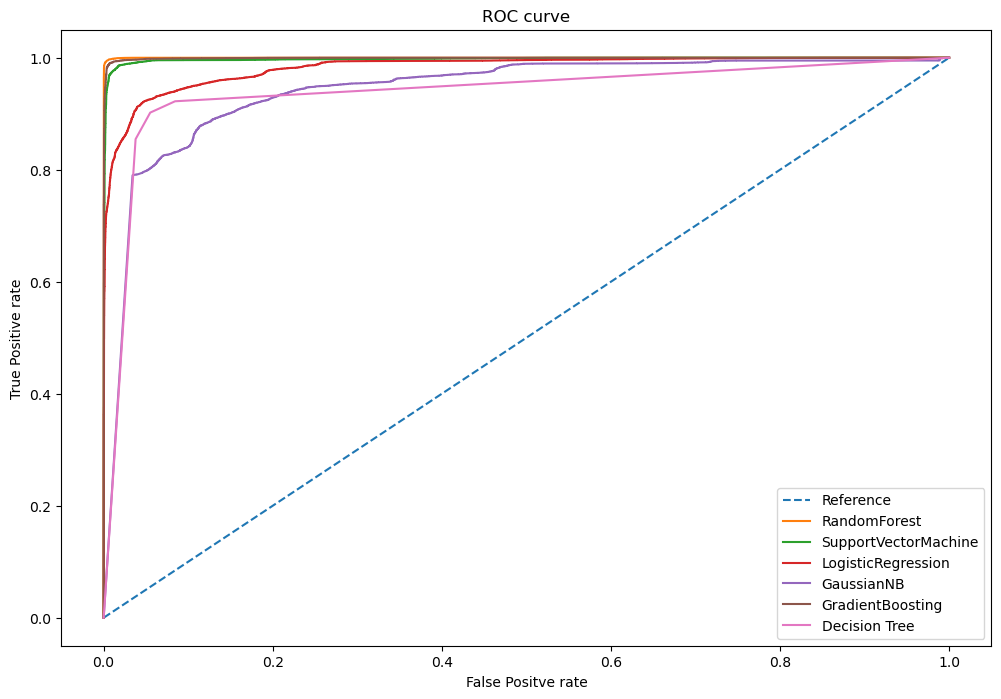

In [63]:
# Plotting ROC Curve

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(ns_fpr, ns_tpr, linestyle= '--', label= 'Reference')
ax.plot(rf_fpr, rf_tpr, linestyle= '-', label= 'RandomForest')
ax.plot(svm_fpr, svm_tpr, linestyle= '-', label= 'SupportVectorMachine')
ax.plot(lg_fpr, lg_tpr, linestyle='-', label= 'LogisticRegression')
ax.plot(nb_fpr, nb_tpr, linestyle='-', label= 'GaussianNB')
ax.plot(gb_fpr, gb_tpr, linestyle='-', label= 'GradientBoosting')
ax.plot(dt_fpr, dt_tpr, linestyle='-', label= 'Decision Tree')
plt.xlabel('False Positve rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
ax.legend(loc="lower right")

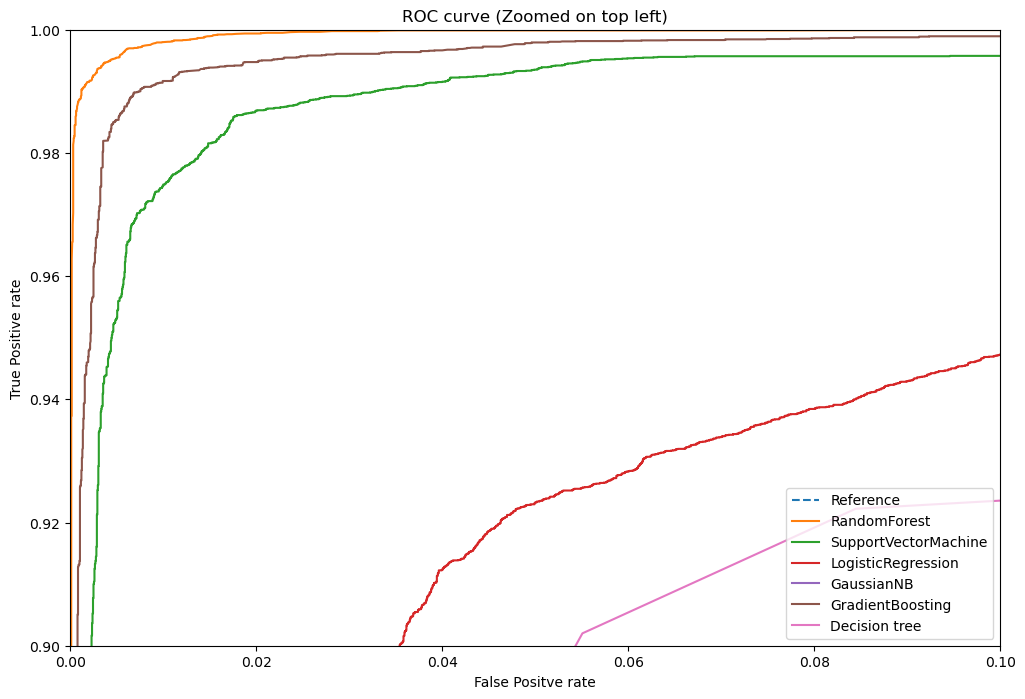

In [64]:
# ROC Curve Zoomed In

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(ns_fpr, ns_tpr, linestyle= '--', label= 'Reference')
ax.plot(rf_fpr, rf_tpr, linestyle= '-', label= 'RandomForest')
ax.plot(svm_fpr, svm_tpr, linestyle= '-', label= 'SupportVectorMachine')
ax.plot(lg_fpr, lg_tpr, linestyle='-', label= 'LogisticRegression')
ax.plot(nb_fpr, nb_tpr, linestyle='-', label= 'GaussianNB')
ax.plot(gb_fpr, gb_tpr, linestyle='-', label= 'GradientBoosting')
ax.plot(dt_fpr, dt_tpr, linestyle='-', label= 'Decision tree')
plt.xlabel('False Positve rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve (Zoomed on top left)')
plt.xlim([0,0.1])
plt.ylim([0.9,1])
ax.legend(loc="lower right")

## Model Performances

In [65]:
models = {
    'Random Forest':rf_mod, 
    'Support Vector Machine': svm_mod,
    'Logistic Regression':lg_mod,
    'Gaussian Naive Bayes': gnb_mod,
    'Gradient Boosting':gb_mod,
    'Decision tree':clf
}

columns = [
    'accuracy',
    'precision',
    'recall',
    'f1'
]

table = {}


for model in models.keys():
    
    pred = models[model].predict(X_test)
    accuracy = models[model].score(X_test,y_test)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    table[model] = [accuracy, precision, recall, f1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.2s finished


In [66]:
results = pd.DataFrame.from_dict(table, orient='index')
results.columns = columns
results

,accuracy,precision,recall,f1
Random Forest,0.995421,0.996194,0.994302,0.995247
Support Vector Machine,0.982871,0.987133,0.977207,0.982145
Logistic Regression,0.937355,0.950376,0.917989,0.933902
Gaussian Naive Bayes,0.880824,0.879984,0.871676,0.875810
Gradient Boosting,0.991301,0.991940,0.990000,0.990969
Decision tree,0.924239,0.938448,0.902011,0.919869
